# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Get what information is retrieved 
query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
city_weather = requests.get(query_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': -38.15, 'lon': 144.57},
 'dt': 1587524928,
 'id': 2171320,
 'main': {'feels_like': 286.88,
          'humidity': 77,
          'pressure': 1020,
          'temp': 289.41,
          'temp_max': 290.93,
          'temp_min': 288.15},
 'name': 'Clifton Springs',
 'sys': {'country': 'AU',
         'id': 9541,
         'sunrise': 1587502490,
         'sunset': 1587541515,
         'type': 1},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 210, 'speed': 4.6}}


In [4]:
city_name = []
latitude = []
longitude = []
tem_max = []
humidity = []
cloudiness =[]
wind = []
number = 0

#Temperature in Kelvin - needs conversion 
for city in cities:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(query_url)
    if response.status_code == 200:
        number += 1
        city_weather = response.json()
        city_name.append(city_weather['name'])
        latitude.append(city_weather['coord']['lat'])
        longitude.append(city_weather['coord']['lon'])
        tem_max.append((city_weather['main']['temp_max'] - 273.15))
        humidity.append(city_weather['main']['humidity'])
        cloudiness.append(city_weather['clouds']['all'])
        wind.append(city_weather['wind']['speed'])
        print(f'Retrieving Record {number} for {city}')
    
    elif response.status_code != 200:
        print(f'{city} not found. Skipping...')

Retrieving Record 1 for arraial do cabo
Retrieving Record 2 for punta arenas
Retrieving Record 3 for yangjiang
tumannyy not found. Skipping...
Retrieving Record 4 for sovetskiy
Retrieving Record 5 for baghdad
Retrieving Record 6 for nikolskoye
Retrieving Record 7 for leningradskiy
Retrieving Record 8 for mataura
Retrieving Record 9 for ponta do sol
Retrieving Record 10 for kandrian
Retrieving Record 11 for kortkeros
Retrieving Record 12 for carolina
Retrieving Record 13 for kashi
Retrieving Record 14 for vaini
Retrieving Record 15 for sault sainte marie
Retrieving Record 16 for atar
Retrieving Record 17 for isangel
Retrieving Record 18 for castro
Retrieving Record 19 for amarwara
illoqqortoormiut not found. Skipping...
kamenskoye not found. Skipping...
Retrieving Record 20 for grindavik
Retrieving Record 21 for cape town
Retrieving Record 22 for ribeira grande
Retrieving Record 23 for bredasdorp
Retrieving Record 24 for narsaq
Retrieving Record 25 for barrow
Retrieving Record 26 for pr

In [7]:
weather_df = pd.DataFrame(city_name, columns = ['City'])
weather_df['Latitude'] = latitude
weather_df['Longitude'] = longitude
weather_df['Max Temperature'] = tem_max
weather_df['Humidity'] = humidity
weather_df['Cloudiness'] = cloudiness
weather_df['Wind Speed'] = wind
weather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Arraial do Cabo,-22.97,-42.03,22.46,80,0,1.56
1,Punta Arenas,-53.15,-70.92,9.00,66,94,15.90
2,Yangjiang,21.85,111.97,27.22,64,100,4.56
3,Sovetskiy,61.36,63.58,5.08,83,100,4.81
4,Baghdad,33.34,44.40,21.00,60,98,4.10


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df.to_csv('weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

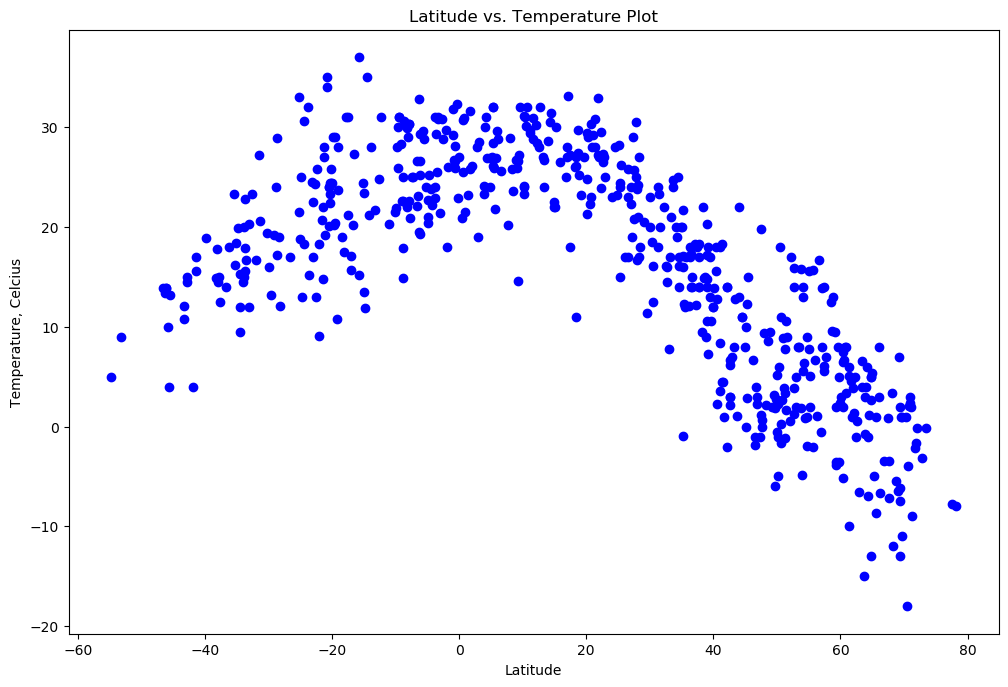

In [9]:
plt.figure(figsize=(12,8), dpi = 100)
plt.scatter(weather_df['Latitude'], weather_df['Max Temperature'], color = 'blue')
plt.xlabel('Latitude')
plt.ylabel('Temperature, Celcius')
plt.title('Latitude vs. Temperature Plot')
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()


#### Latitude vs. Humidity Plot

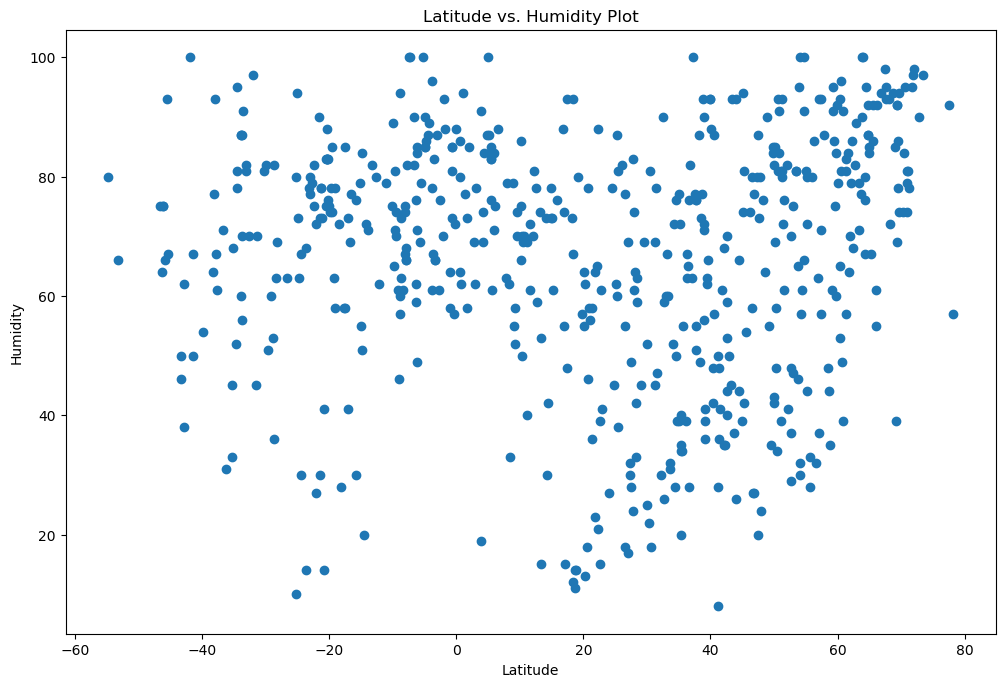

In [10]:
plt.figure(figsize=(12,8), dpi = 100)
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity Plot')
plt.savefig('Latitude vs. Humidity Plot.png')
plt.show()


#### Latitude vs. Cloudiness Plot

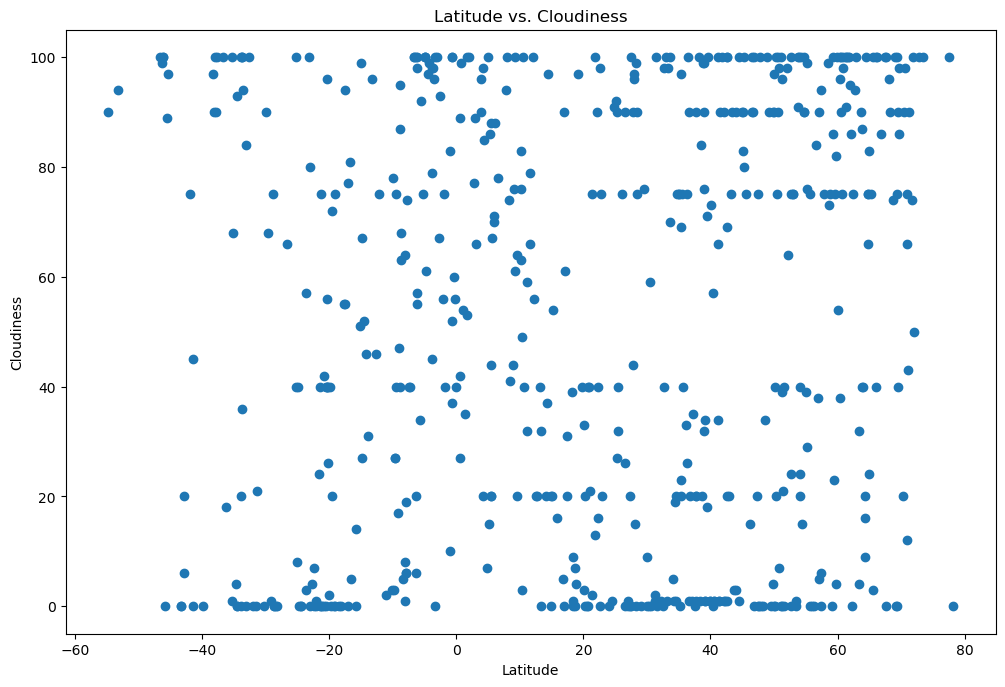

In [11]:
plt.figure(figsize=(12,8), dpi = 100)
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.savefig('Latitude vs. Cloudiness Plot.png')
plt.show()

#### Latitude vs. Wind Speed Plot

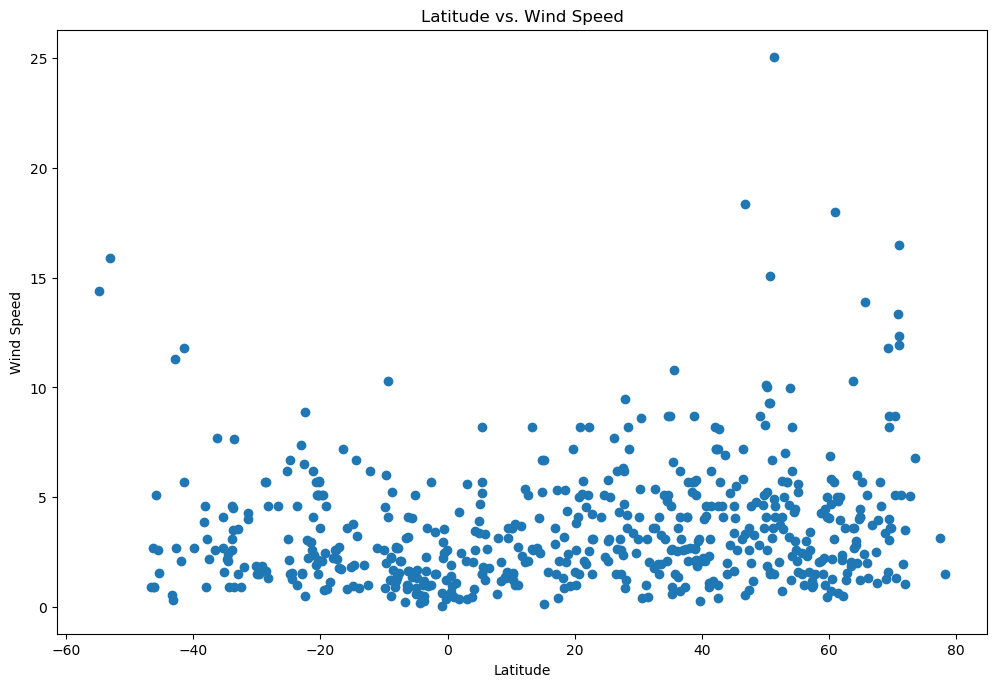

In [12]:
plt.figure(figsize=(12,8), dpi = 100)
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.savefig('Latitude vs. Wind Speed Plot.png')
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern = weather_df.loc[weather_df['Latitude'] >= 0]
northern

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
2,Yangjiang,21.85,111.97,27.22,64,100,4.56
3,Sovetskiy,61.36,63.58,5.08,83,100,4.81
4,Baghdad,33.34,44.40,21.00,60,98,4.10
5,Nikolskoye,59.70,30.79,5.00,60,4,5.00
6,Leningradskiy,69.38,178.42,-7.43,92,0,3.03
...,...,...,...,...,...,...,...
559,Holzwickede,51.50,7.63,10.56,61,0,4.60
561,Ukiah,39.15,-123.21,18.00,39,1,5.10
562,Deshnok,27.80,73.34,30.56,24,44,4.67
565,Yerköy,39.64,34.47,10.61,66,100,0.26


In [15]:
# Create Northern and Southern Hemisphere DataFrames
southern = weather_df.loc[weather_df['Latitude'] < 0]
southern

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Arraial do Cabo,-22.97,-42.03,22.46,80,0,1.56
1,Punta Arenas,-53.15,-70.92,9.00,66,94,15.90
7,Mataura,-46.19,168.86,13.89,75,100,0.89
9,Kandrian,-6.22,149.55,26.64,85,100,3.21
13,Vaini,-21.20,-175.20,28.00,78,75,4.10
...,...,...,...,...,...,...,...
556,Kieta,-6.22,155.63,29.29,71,55,0.97
560,Bambanglipuro,-7.95,110.28,30.35,66,6,1.39
563,Japura,-0.32,102.35,32.33,57,60,1.23
564,Lagoa Vermelha,-28.21,-51.53,12.03,69,0,1.32


In [16]:
def linearregression(x, y, ylabel):
    figname = 'Latitude vs' + ylabel
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f'The r-squared is: {r_value}')
    plt.scatter(x, y, label='original data')
    plt.plot(x, intercept + slope*x, label='fitted line', color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.annotate('$y=%3.7sx+%3.7s$'%(slope, intercept), annotate_spot, color = 'red',fontsize=10)
    plt.savefig(figname)
    plt.show()


The r-squared is: -0.8732209684439441


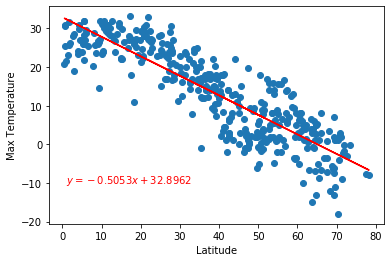

In [17]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x = northern['Latitude']
y = northern['Max Temperature']
ylabel = 'Max Temperature'
annotate_spot = (1, -10)
linearregression(x, y, ylabel)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6561809314963377


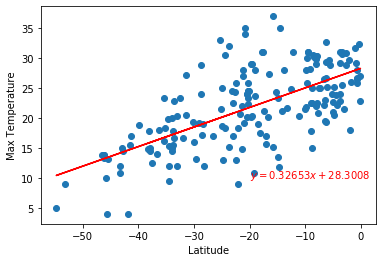

In [18]:
x = southern['Latitude']
y = southern['Max Temperature']
ylabel = 'Max Temperature'
annotate_spot = (-20, 10)
linearregression(x, y, ylabel)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22483639563189137


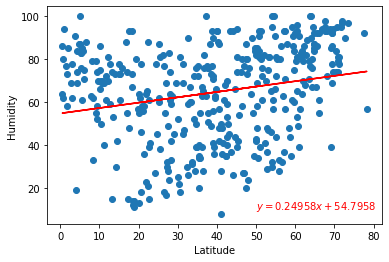

In [19]:
x = northern['Latitude']
y = northern['Humidity']
ylabel = 'Humidity'
annotate_spot = (50, 10)
linearregression(x, y, ylabel)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16759704544593806


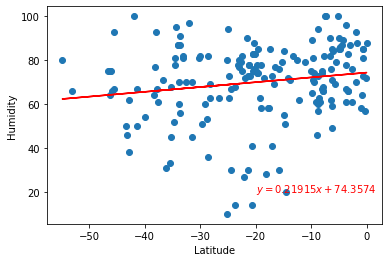

In [20]:
x = southern['Latitude']
y = southern['Humidity']
ylabel = 'Humidity'
annotate_spot = (-20, 20)
linearregression(x, y, ylabel)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13661224485849868


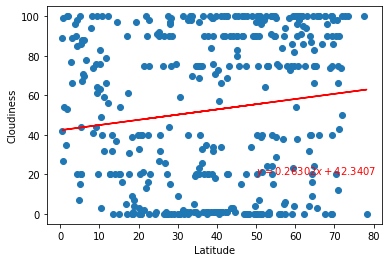

In [21]:
x = northern['Latitude']
y = northern['Cloudiness']
ylabel = 'Cloudiness'
annotate_spot = (50, 20)
linearregression(x, y, ylabel)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07537213874139577


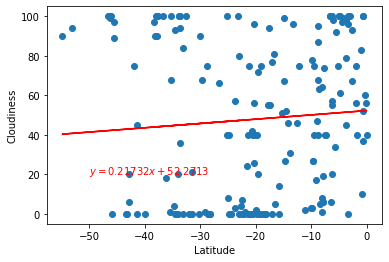

In [22]:
x = southern['Latitude']
y = southern['Cloudiness']
ylabel = 'Cloudiness'
annotate_spot = (-50, 20)
linearregression(x, y, ylabel)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20750009249921472


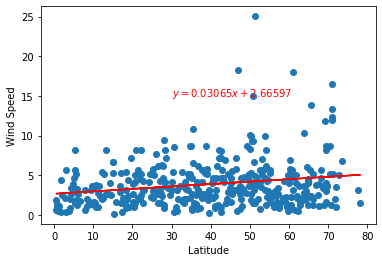

In [23]:
x = northern['Latitude']
y = northern['Wind Speed']
ylabel = 'Wind Speed'
annotate_spot = (30, 15)
linearregression(x, y, ylabel)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.318989918810395


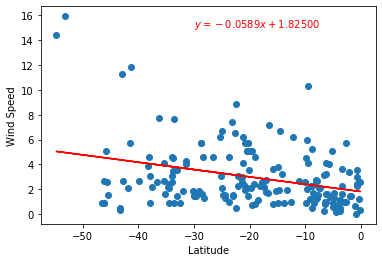

In [24]:
x = southern['Latitude']
y = southern['Wind Speed']
ylabel = 'Wind Speed'
annotate_spot = (-30, 15)
linearregression(x, y, ylabel)

Findings: 
    
Wind speed tends to increase when moving towards the north or south poles of earch; while the plot of level of couldiness may seem arbitrary, there is a tendency of increase in cloudiness when it gets closer to the equator. Maximum temperature is quite obvious - higher temeperature are observed in areas closer to the equator, and much lower in the north and south poles. 